#### Connect the MySQL database ####

In [1]:
import mysql.connector
import pandas as pd
import numpy as np
import torch
import re
import matplotlib.pyplot as plt

In [2]:
connection = mysql.connector.connect(
            host='localhost',
            user='root',
            password='@America155088',
            database='PPT'
            )

In [3]:
query = """ SELECT * FROM posts_details"""
df = pd.read_sql(query, connection)

/var/folders/xp/1gy0dsh531s017q00bdzwmgw0000gn/T/ipykernel_72674/2071830198.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, connection)


In [ ]:
df[df['title'].str.contains('問卦')]

#### Sentiment Analysis

In [134]:
from keybert import KeyBERT

In [135]:
kw_model = KeyBERT()
keywords = kw_model.extract_keywords(df['content'][0])
keywords

[('只是有一次洗的時候阿肥隔壁的眼睛仔眼鏡放在池子邊洗一洗一不小心掉下去之後他就趴在池上用手下去撈眼鏡另一隻手拿者臉盆擋住屁股嘴裡喊著要我別肛他操',
  0.7071),
 ('阿肥我在成功嶺的時候有洗過大澡堂', 0.5592),
 ('之銘言', 0.4891),
 ('有沒有八卦', 0.4491),
 ('聽說以前當兵都是一起洗澡是真的嗎', 0.4413)]

In [14]:
def clean_text(text):
    text = re.sub(r"[^\u4e00-\u9fff\d.a-zA-Z%+\-。！？，、；：（ 【】《》“”‘’]", '', text)  # 去除特殊字符
    return text

#### Content summarize

Ckiptagger website: https://github.com/ckiplab/ckiptagger/wiki/Chinese-README

In [5]:
import ckiptagger

In [6]:
from ckiptagger import data_utils, construct_dictionary, WS, POS, NER

In [21]:
#data_utils.download_data_gdown("./ckiptagger_data")

Downloading...
From (original): https://drive.google.com/uc?id=1efHsY16pxK0lBD2gYCgCTnv1Swstq771
From (redirected): https://drive.google.com/uc?id=1efHsY16pxK0lBD2gYCgCTnv1Swstq771&confirm=t&uuid=3e9a7ffe-bd05-4fc6-920a-8b5dfb058aac
To: /Users/kevinhsu/Documents/GitHub/PPT_Scraping/Text_Mining/ckiptagger_data/data.zip
100%|██████████| 1.88G/1.88G [00:58<00:00, 32.2MB/s]


In [7]:
ws = WS("./ckiptagger_data/data")
pos = POS("./ckiptagger_data/data")
ner = NER("./ckiptagger_data/data")

/Users/kevinhsu/opt/miniconda3/envs/tensorflow/lib/python3.10/site-packages/ckiptagger/model_ws.py:106: UserWarning: `tf.nn.rnn_cell.LSTMCell` is deprecated and will be removed in a future version. This class is equivalent as `tf.keras.layers.LSTMCell`, and will be replaced by that in Tensorflow 2.0.
  cell = tf.compat.v1.nn.rnn_cell.LSTMCell(hidden_d, name=name)


Metal device set to: Apple M1 Pro

systemMemory: 16.00 GB
maxCacheSize: 5.33 GB



2024-05-03 15:06:33.596769: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-05-03 15:06:33.596811: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)
2024-05-03 15:06:33.614926: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:357] MLIR V1 optimization pass is not enabled
2024-05-03 15:06:33.692236: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2024-05-03 15:06:33.702760: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-05-03 15:06:34.151879: I tensorflow/core/grappler/optimizers/custom_graph_

In [8]:
word_to_weight = {
    "鄉民": 1,
    '據了解':1,
    '不夠':1,
}

In [9]:
dictionary = construct_dictionary(word_to_weight)
print(dictionary)

[(2, {'鄉民': 1.0, '不夠': 1.0}), (3, {'據了解': 1.0})]


In [12]:
sentence_list = [df['content'][1]]

In [15]:
clean_text(sentence_list[0])

'1. 標題 攸泰科技 申購抽籤日程資訊2. 來源 TWSE 公開申購公告-抽籤日程表3. 網址 4. 內文股票代號：6928 攸泰科技公司名稱中：攸泰科技股份有限公司公司名稱英：Ubiqconn Technology Inc.產業別：電腦及週邊設備業發行市場：初上市主辦券商：福邦承銷價：65.00元承銷張數：1980張申購張數：1張（扣款金額65070元競拍價格行情競拍張數：7920張最低投標價：54.62元最高投得標數：231張最低得標價：79.30元最高得標價：106.40元得標加權平均價：84.76元市場價格行情昨收價：104.12元5日移均價：106.40元10日移均價：109.65元20日移均價：103.56元60日移均價：94.30元申購開始日：20240506申購截止日：20240508扣款日：20240509抽籤日：20240510未中籤退款日：20240513撥券日：20240516--'

In [16]:
word_sentence_list = ws(
        sentence_list,
        sentence_segmentation = True, # To consider delimiters 分隔符號
        # segment_delimiter_set = {",", "。", ":", "?", "!", ";"}), # This is the defualt set of delimit$
        #recommend_dictionary = dictionary1, # words in this dictionary are encouraged 鼓勵，支援
        coerce_dictionary = dictionary, # words in this dictionary are forced 強制
    )

2024-05-03 15:06:58.685594: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


In [34]:
print(word_sentence_list[0])

['欸', '欸', '最近', '八', '年', '來', '，', '股市', '一直', '破', '新高', '這', '八', '年', '，', '鄉民', '都', '有', '賺到', '錢', '吧', '？', '一定', '有', '賺到', '錢', '吧', '？', '有', '沒', '有', '這', '方面', '的', '八卦', '？', '--']


In [62]:
sentence_list = [df['content'][5]]
sentence_list

["['※ 引述《admeta (陽明山)》之銘言：', ': 三立', ': 快訊／遺體找到了！打賭1000元游到對岸\\u3000男高職生溺水喪命', ': 記者楊忠翰／新北報導', ': 新北市永和區驚傳溺水案件，15日晚間時分，4名高職生前往綠光河岸公園，其中3人打賭', ': 游到對岸，並以1千元為籌碼，2人上岸後先行返回宿舍，另名男同學卻遲未現身，2人返', ': 回河濱公園尋找，卻只發現男同學隨身物品，只好趕緊打電話報案，警消歷經1日搜救，', ': 終於尋獲該名男同學，但他已經明顯死亡。', ': 據了解，25日晚間9時許，同為22歲的緬甸籍板姓、黃姓及坤姓男學生，與19歲的徐姓女', ': 同學，一同購買啤酒、滷味到綠光河岸公園聊天，徐女感到疲累先行返回宿舍，黃男及坤', ': 男則向板男表示：「如果你從這游過去，就給你1千元」，接著2人跳入水中，從永和端游', ': 至北市端上岸。', ': 黃男、坤男上岸後步行離去，但2人回到宿舍多時，卻一直沒看到板男出現，2人急忙跑回', ': 河濱公園，只找到板男衣物及手機，2人在附近尋找未果，急忙打電話通知校方並報案。', ': 16日凌晨時分，警消獲報後下艇搜救，直到17日上午11時38分才尋獲板男，但他早已明顯', ': 死亡，警消已將遺體打撈上岸，目前正在等待學校教官前來認屍。', ':', '', ': ▲新北市消防局稍早尋獲緬甸籍板姓男學生遺體。'] 安安你好~我是蕉哥身為一個多年救生經驗、在溪邊海邊救過數十人的救生員，有些經驗想跟大家分享。---喝酒下水、年輕人愛打賭、做出超過自己能力範圍的事情，非常明顯就是這次意外發生的主因。根據我在海邊救生的經驗，多數被救上岸的溺者也都表示自己「會游泳」，不過依然發生了溺水意外。而網路上也常常流傳著一句話─善泳者溺。這句話，真的有其道理嗎？** 網誌好讀版： ///▍會溺水的人都是會游泳的人？在台灣，游泳能力早已被列為學校的畢業門檻之一。但這樣的制度施行之後，是否就代表所有從學校畢業的人，都屬於會游泳的人？顯然事實並非如此。台灣的游泳門檻過低，導致許多人都以為自己「會游泳」；台灣的家長也以為送孩子去上游泳課，就等於有能力在開放水域戲水。這樣的認知完全是錯誤的！事實上，多數人上完游泳課後都具備基本的游泳能力，只是必須滿足穿著泳裝、戴蛙鏡、在腳能夠觸地的有泳池

In [17]:
import jieba

In [21]:
df.dropna(inplace=True)

In [22]:
merge_str = df[df['title'].str.contains('問卦')]['content'].apply(str)

In [23]:
match = ' '.join(merge_str)

In [24]:
res = str(re.findall(r'[\da-zA-Z\u4e00-\u9fff]+', match))

In [25]:
word_count = {}
str_list = jieba.cut(res)
for i in str_list:
    if i in word_count:
        word_count[i] +=1
    else:
        word_count[i] = 1

Building prefix dict from the default dictionary ...
Dumping model to file cache /var/folders/xp/1gy0dsh531s017q00bdzwmgw0000gn/T/jieba.cache
Loading model cost 0.383 seconds.
Prefix dict has been built successfully.


In [36]:
del_words_path ='/Users/kevinhsu/Documents/GitHub/PPT_Scraping/Text_Mining/delete.txt'
del_words_list = []

In [37]:
with open(del_words_path, 'r', encoding='utf-8') as f:
    for line in f.readlines():
        del_words_list.append(line)

In [38]:
del_result = []
for i in del_words_list:
    del_result.append(i.replace('\n', ''))

In [39]:
keys_to_remove = [key for key, value in word_count.items() if len(key) == 1]

# Removing those keys from the dictionary
for key in keys_to_remove:
    del word_count[key]

In [40]:
keys_to_remove = [key for key, value in word_count.items() if key in del_result]

# Removing those keys from the dictionary
for key in keys_to_remove:
    del word_count[key]

### WordCloud

In [31]:
from wordcloud import WordCloud
from collections import Counter

In [32]:
font = "/Users/kevinhsu/Downloads/SourceHanSansTW-Regular.otf"

In [41]:
Wcloud = WordCloud(background_color='white', font_path=font)

In [42]:
Wcloud.generate_from_frequencies(word_count)

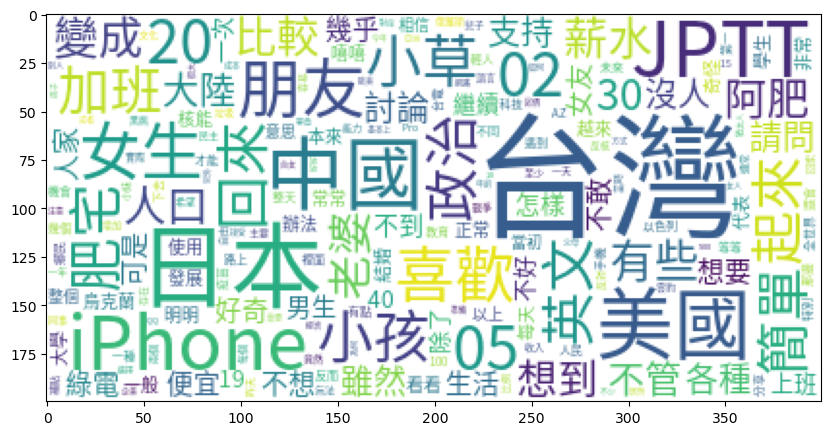

In [43]:
plt.figure(figsize=(10,10))
plt.imshow(Wcloud)
plt.show()